# Differential Drive Robot Kinematic Modeling

This *Jupyter Notebook* is dedicated to the study of the **Differential Drive Robot Kinematic Modeling**. 

The following study will be developed by the implementation of *Python* code for the application and visualization of the concepts learned with the use of *NumPy* and *Plotly* libraries. 

The following model is based and adapted from [this article](https://aleksandarhaber.com/clear-and-detailed-explanation-of-kinematics-equations-and-geometry-of-motion-of-differential-wheeled-robot-differential-drive-robot/#google_vignette).

---

## Forward Kinematics Model

This model is meant for studying the **Forward Kinematic** problem. The whole idea of forward (or direct) kinematics is to answer: "If provide certain inputs to my robot, where would it end up?". Intuitively, this feels like manually controlling something (because it is).

This is *not* what robotics usually looks like - in general, the question to be answered is "if i want my robot to end up there, what should my inputs be?". It is clear that this question is quite the opposite. This is the **Inverse Kinematics** problem, and it's usually much harder to solve, entering in the likes of path planning, motion control and etc...

But, to understand the Inverse Kinematics problem, it is required to first understand the Forward Kinematics problem. 

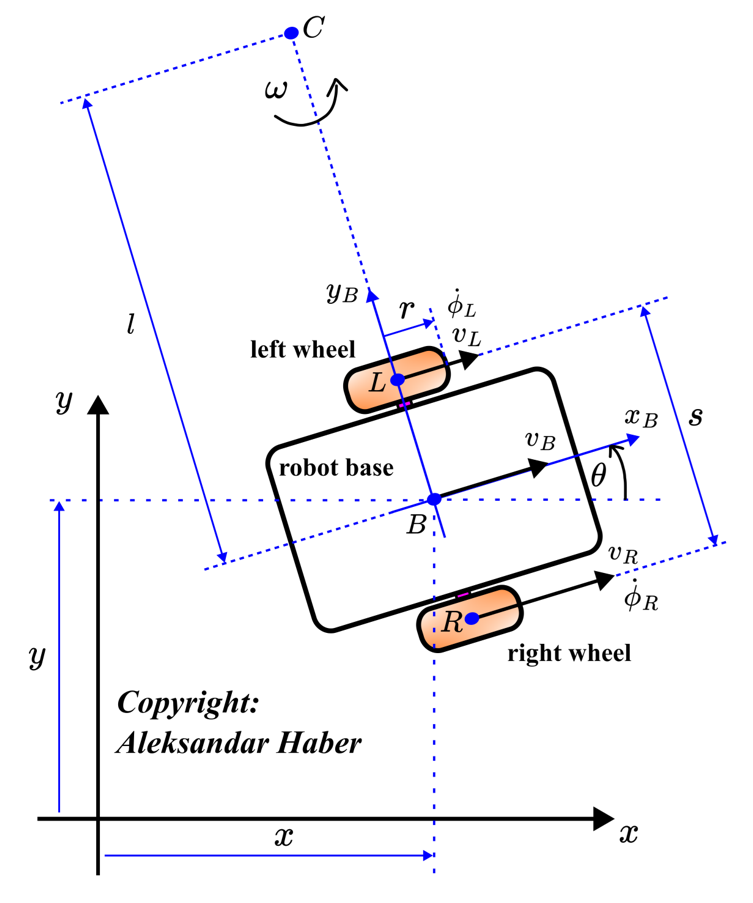

**Chassi Parameters:**
- $L$ is the center point of the left wheel;
- $R$ is the center point of the right wheel;
- $B$ is the middle point between the points $L$ and $R$;
- $r$ is the radius of the wheels;
- $s$ is the distance between the points $L$ and $R$.

**Pose Parameters:**
- $\begin{bmatrix} 
    x \\
    y \\
    \theta
\end{bmatrix}$ represents the pose (position and orientation) parameters  of the robot in the inertial reference;
- $x$ and $y$ are the coordinates in the cartesian frame of the inertial reference ;
- $\theta$ is the angle of rotation of the robot which is at the same time the angle between the body frame and the inertial frame.

**Motion Parameters:**
- $C$ is the instantaneous center of rotation;
- $l$ is the distance between the point $B$ and the point $C$;
- $\omega_{B}$ is the instantaneous angular velocity of the robot body;
- $v_{B}$ is the velocity of the point $B$;
- $v_{L}$ and $v_{R}$ are the linear velocities of the right and left wheels respectively;
- $\dot{\phi}_{L}$ and $\dot{\phi}_{R}$ are the angular velocities of the left and right wheels respectively;
- $\dot{x}$ and $\dot{y}$ are the linear velocities of the robot in the inertial frame.

The forward kinematics state variables pipeline of the differential drive robot consists of:

$$
\begin{bmatrix} 
    \dot{\phi}_{L} \\
    \dot{\phi}_{R}
\end{bmatrix}

\xrightarrow[]{T_1}

\begin{bmatrix} 
    v_{L} \\
    v_{R}
\end{bmatrix}

\xrightarrow[]{T_2}

\begin{bmatrix} 
    v_{B} \\
    \omega_{B}
\end{bmatrix}

\xrightarrow[]{T_3}

\begin{bmatrix} 
    \dot{x} \\
    \dot{y} \\
    \dot{\theta}
\end{bmatrix}
$$

---

### Wheels' Angular Velocities to Linear Velocities

$$
\begin{bmatrix} 
    \dot{\phi}_{L} \\
    \dot{\phi}_{R}
\end{bmatrix}

\xrightarrow[]{T_1}

\begin{bmatrix} 
    v_{L} \\
    v_{R}
\end{bmatrix}
$$

From the uniform circular motion theory in kinematics:

$$v = \omega \cdot R$$

Where:

- $v$ is the tangential velocity of a point following a circular path;
- $omega$ is the angular velocity of the point;
- $R$ is the radius of the circular path.

Applying to the tangent velocity on the wheel and their respective angular velocity:

$$
\begin{cases} 
    v_{L} = \dot{\phi}_{L} \cdot r \\
    v_{R} = \dot{\phi}_{R} \cdot r
\end{cases}
$$

Which can be condensed to:

$$
\begin{bmatrix} 
    v_{L} \\
    v_{R}
\end{bmatrix}

= 

\begin{bmatrix} 
    r  & 0 \\
    0 & r
\end{bmatrix}

\cdot

\begin{bmatrix} 
    \dot{\phi}_{L} \\
    \dot{\phi}_{R}
\end{bmatrix}
$$

---

### Wheels' Velocities to Body's Linear and Angular Velocities

$$
\begin{bmatrix} 
    v_{L} \\
    v_{R}
\end{bmatrix}

\xrightarrow[]{T_2}

\begin{bmatrix} 
    v_{B} \\
    \omega_{B}
\end{bmatrix}
$$

The wheel tangent velocities must be converted on the velocity of the robot on itself and it's angular velocity across its instantenous center of rotation $C$. The fundamental principle is that the wheels are always following the path of concentric circles.

The following relation also comes from uniform circular motion:

$$
\begin{cases} 
    v_{L} = \omega_{B} \cdot (l - \frac{s}{2}) \\
    v_{B} = \omega_{B} \cdot l \\
    v_{R} = \omega_{B} \cdot (l + \frac{s}{2})
\end{cases}
$$

Since $l$ is unknown, it is possible to use the relations above to represent them in terms of $v_{L}$, $v_{R}$ and $s$, which are known:

$$l = \frac{s(v_{R} + v_{L})}{2(v_{R} - v_{L})}$$

With $l$ in terms of these variables, it's possible to recover $\omega_{B}$ from these relations, and in sequence, $v_{B}$

$$
\begin{cases} 
    \omega_{B} = \frac{v_{R} - v_{L}}{s} \\
    v_{B} = \frac{v_{R} + v_{L}}{2}
\end{cases}
$$

Which can be condensed to:

$$
\begin{bmatrix} 
    v_{B} \\
    \omega_{B}
\end{bmatrix}

= 

\begin{bmatrix} 
    \frac{1}{2} & \frac{1}{2} \\
    -\frac{1}{s} & \frac{1}{s}
\end{bmatrix}

\cdot

\begin{bmatrix} 
    v_{L} \\
    v_{R}
\end{bmatrix}
$$

---

### Reference Change to Inertial Frame

$$
\begin{bmatrix} 
    v_{B} \\
    \omega_{B}
\end{bmatrix}

\xrightarrow[]{T_3}

\begin{bmatrix} 
    \dot{x} \\
    \dot{y} \\
    \dot{\theta}
\end{bmatrix}
$$

Since $\dot{x}$ and $\dot{y}$ are the velocities on the $x$ and $y$ inertial frame, meaning that they are actually just projections of $v_{B}$ on them.

$$
\begin{cases} 
    v_{x} = \dot{x} = v_{B} \cdot \cos\theta \\
    v_{y} = \dot{y} = v_{B} \cdot \sin\theta
\end{cases}
$$

Since the turn angle $\theta$ is the same made around $C$, then:

$$\dot{\theta} = \omega_{B}$$

All of this can be condensed to:

$$
\begin{bmatrix} 
    \dot{x} \\
    \dot{y} \\
    \dot{\theta}
\end{bmatrix}

= 

\begin{bmatrix} 
    \cos\theta & 0 \\
    \sin\theta & 0 \\
    0 & 1
\end{bmatrix}

\cdot

\begin{bmatrix} 
    v_{B} \\
    \omega_{B}
\end{bmatrix}
$$

---

### Condensed Kinematics Model

Joining all the transformations above, a condensed model can be derived:

$$
\begin{bmatrix} 
    \dot{x} \\
    \dot{y} \\
    \dot{\theta}
\end{bmatrix}

= 

\begin{bmatrix} 
    \cos\theta & 0 \\
    \sin\theta & 0 \\
    0 & 1
\end{bmatrix}

\cdot

\begin{bmatrix} 
    \frac{1}{2} & \frac{1}{2} \\
    -\frac{1}{s} & \frac{1}{s}
\end{bmatrix}

\cdot 

\begin{bmatrix} 
    r  & 0 \\
    0 & r
\end{bmatrix}

\cdot

\begin{bmatrix} 
    \dot{\phi}_{L} \\
    \dot{\phi}_{R}
\end{bmatrix}
$$

or

$$
\begin{bmatrix} 
    \dot{x} \\
    \dot{y} \\
    \dot{\theta}
\end{bmatrix}

= 

\begin{bmatrix} 
    \frac{r\cos\theta}{2} & \frac{r\cos\theta}{2} \\
    \frac{r\sin\theta}{2} & \frac{r\sin\theta}{2} \\
    -\frac{r}{s} & \frac{r}{s}
\end{bmatrix}

\cdot

\begin{bmatrix} 
    \dot{\phi}_{L} \\
    \dot{\phi}_{R}
\end{bmatrix}
$$

---

In [1]:
# Importing modules...
import numpy as np

import sys
sys.path.append('..') # Go back to base directory

from modules.graph import *
from modules.viewer3d import *

In [2]:
# Differential drive model 
class DifferentialDrive:
    def __init__(
        self,
        r, # Wheel radius
        s, # Space between wheels
        h = 0.0, # Robot height

        dt = 1e-2, # Differential time step

        # Initial pose parameters (aligned with the inertial frame and unmoving)
        x = 0.0,
        y = 0.0,
        theta = 0.0
    ):
        # Time parameters
        self.dt = dt

        # Robot geometry
        self.r = r
        self.s = s
        self.h = h
 
        # Robot pose
        self.x = x
        self.y = y
        self.theta = theta

        # State variables initial conditions
        self.phi_dot_L = 0.0
        self.phi_dot_R = 0.0

        self.v_L = 0.0
        self.v_R = 0.0

        self.v_B = 0.0
        self.w_B = 0.0

        self.x_dot = 0.0
        self.y_dot = 0.0
        self.theta_dot = 0.0

        # Transformation Matrices 
        self.T1 = np.array(
            [
                [r, 0],
                [0, r]
            ]
        )

        self.T2 = np.array(
            [
                [1/2,  1/2],
                [-1/s, 1/s]
            ]
        )

        self.T3 = lambda self : np.array(
            [
                [np.cos(self.theta), 0],
                [np.sin(self.theta), 0],
                [                 0, 1]
            ]
        )

    def kinematic_model(self, wheels_angular_velocities):
        # Calculate and update state variables
        [[self.phi_dot_L], [self.phi_dot_R]] = wheels_angular_velocities

        wheels_linear_velocities = self.T1 @ wheels_angular_velocities
        [[self.v_L], [self.v_R]] = wheels_linear_velocities

        body_velocities = self.T2 @ wheels_linear_velocities
        [[self.v_B], [self.w_B]] = body_velocities

        intertial_velocities = self.T3(self) @ body_velocities
        [[self.x_dot], [self.y_dot], [self.theta_dot]] = intertial_velocities

        # Integrate using Euler's Method
        self.x += self.x_dot * self.dt
        self.y += self.y_dot * self.dt
        self.theta += self.theta_dot * self.dt

    def get_output(self):
        return np.array(
            [
                [self.x], 
                [self.y], 
                [self.theta]
            ]
        )
    
    def get_position(self):
        return np.array(
            [
                [self.x], 
                [self.y], 
                [self.h]
            ]
        )
    
    def get_orientation(self):
        return np.array(
            [
                [np.cos(self.theta), -np.sin(self.theta), 0],
                [np.sin(self.theta),  np.cos(self.theta), 0],
                [                 0,                   0, 1]
            ]
        )
    
    def get_pose(self):
        # Get position and orientation
        t = self.get_position()
        R = self.get_orientation()
        
        return np.vstack((np.hstack((R, t)), [0, 0, 0, 1]))
    
    def turn_signal(self, theta, t):
        theta_dot = theta / t 
        phi_dot = theta_dot * self.s / (2 * self.r)
        phi_dot_signal = phi_dot * np.ones(int(t / self.dt))

        wheels_angular_velocities = np.array(
            [
                -phi_dot_signal,
                phi_dot_signal
            ]
        )

        return wheels_angular_velocities

    def drive_signal(self, d, t):
        v_B = d / t
        phi_dot = v_B / self.r
        phi_dot_signal = phi_dot * np.ones(int(t / self.dt))

        wheels_angular_velocities = np.array(
            [
                phi_dot_signal,
                phi_dot_signal
            ]
        )

        return wheels_angular_velocities
    
    def concatenate_signals(self, signals):
        complete_signal = np.hstack(signals)
        time_vector = np.linspace(0, complete_signal.shape[1] * self.dt, complete_signal.shape[1])

        return complete_signal, time_vector

In [3]:
# Instanciating and simulating the model
DDR = DifferentialDrive(
    # Robot geometry
    r=15.0, # In mm
    s=60.0, # In mm
    h=30.0, # in mm 

    # Time parameters
    dt=1e-2,

    # Initial pose parameters
    x=0.0, # In mm
    y=0.0, # In mm
    theta=0.0 # In radians
)

# Simulation time parameters
start_time = 0.0 # In Seconds
stop_time = 50.0 # In Seconds

time_vector = np.linspace(
    start_time, 
    stop_time, 
    int((stop_time - start_time) / DDR.dt)
)

# Wheels angular velocities signals in rad/s
phi_dot_L_signal = 2.0 * np.ones(time_vector.shape)
phi_dot_R_signal = 4.0 * np.linspace(0.0, 1.0, time_vector.shape[0])

# Compute solution
output, poses, positions = [], [], []
for phi_dot_L, phi_dot_R in zip(phi_dot_L_signal, phi_dot_R_signal):
    wheels_angular_velocities = np.array([[phi_dot_L], [phi_dot_R]])

    DDR.kinematic_model(wheels_angular_velocities)
    
    output.append(DDR.get_output())
    positions.append(DDR.get_position())
    poses.append(DDR.get_pose())

output = np.hstack(output)
trajectory = np.hstack(positions)

In [4]:
# Plot input variables
graph = Graph(
    title="Inputs in Time Domain", 
    axis_title=("Time (s)", "Wheels' Angular Velocities (rad/s)")
)

graph.add_trace(
    points=np.vstack((time_vector, phi_dot_L_signal)), 
    name="Left"
)

graph.add_trace(
    points=np.vstack((time_vector, phi_dot_R_signal)), 
    name="Right"
)

graph.figure.show(renderer='notebook_connected')

In [5]:
# Plot output variables
graph = Graph(
    title="Outputs in Time Domain", 
    axis_title=("Time (s)", "Differential Drive Robot Pose Parameters")
)

graph.add_trace(
    points=np.vstack((time_vector, output[0])), 
    name="x (mm)"
)

graph.add_trace(
    points=np.vstack((time_vector, output[1])), 
    name="y (mm)"
)

graph.add_trace(
    points=np.vstack((time_vector, output[2])), 
    name="theta (rad)"
)

graph.figure.show(renderer='notebook_connected')


In [6]:
# Create the Scene Viewer
scene = Viewer3D(title="Differential Drive Robot Trajectory Display", 
                 size=500) # In mm

# Add inertial reference
scene.add_frame(
    transformation=np.eye(4), 
    name="Inertial Reference", 
    axis_size=40
)

# Add robot trajectory 
scene.add_points(points=trajectory, 
                 name='DDR',
                 color=time_vector,
                 colorscale='plasma',
                 range=[time_vector[0], time_vector[-1] + 5],
                 colorbar="Time (s)")

# Display poses
n_poses = 10
for pose in poses[::len(poses) // n_poses]:
    # Add poses
    scene.add_frame(
        transformation=pose, 
        axis_size=20,
        color='black'
    )

scene.figure.show()
